In [54]:
import os
from datetime import datetime
from dataclasses import dataclass
import json


video_path = "../video_data"
image_path = "../data/ground_truth/cxl/full_images"
timestamps_path = "../data/derived_data/timestamps.json"

video_names = os.listdir(video_path)
image_names = os.listdir(image_path)
timestamps = json.load(open(timestamps_path))


@dataclass
class Video:
    camera_id: str
    date: datetime


@dataclass
class Image:
    gorilla_id: str
    camera_id: str
    data: datetime


def extract_video_info(video_name) -> Video:
    try:
        filename, _ = os.path.splitext(video_name)
        camera_id, date_str, _ = filename.split("_")
        date = datetime.strptime(date_str, "%Y%m%d")
        timestamp = timestamps[filename]
        daytime = datetime.strptime(timestamp, "%I:%M %p")
        date = datetime.combine(date, daytime.time())
    except ValueError:
        print(f"Could not parse {video_name}")
        return None
    except KeyError:
        # print(f"Could not find timestamp for {video_name}")
        pass
    return Video(camera_id, date)


def extract_image_info(image_name) -> Image:
    try:
        gorilla_id, camera_id, date_str, _ = image_name.split("_")
        date = datetime.strptime(date_str, "%Y%m%d")
        return Image(gorilla_id, camera_id, date)
    except ValueError:
        print(f"Could not parse {image_name}")
        return None


videos = list(filter(lambda v: v is not None, map(extract_video_info, video_names)))
images = list(filter(lambda i: i is not None, map(extract_image_info, image_names)))

camera_ids = set(map(lambda v: v.camera_id, videos))
gorilla_ids = set(map(lambda i: i.gorilla_id, images))

print(videos[:5])
print(images[:5])

Could not parse .mp4
Could not parse YE01_R035_20191012_079 _son.png
Could not parse GR01_R065_20181202_328gr_son.png
[Video(camera_id='R169', date=datetime.datetime(2022, 9, 29, 9, 7)), Video(camera_id='R508', date=datetime.datetime(2022, 6, 24, 17, 51)), Video(camera_id='R033', date=datetime.datetime(2022, 3, 21, 6, 58)), Video(camera_id='R108', date=datetime.datetime(2023, 1, 28, 13, 57)), Video(camera_id='R465', date=datetime.datetime(2023, 1, 3, 11, 30))]
[Image(gorilla_id='JZ40', camera_id='R507', data=datetime.datetime(2021, 1, 7, 0, 0)), Image(gorilla_id='NN03', camera_id='R018', data=datetime.datetime(2021, 9, 18, 0, 0)), Image(gorilla_id='MU00', camera_id='R051', data=datetime.datetime(2022, 4, 8, 0, 0)), Image(gorilla_id='AP01', camera_id='R066', data=datetime.datetime(2022, 11, 18, 0, 0)), Image(gorilla_id='NN02', camera_id='R018', data=datetime.datetime(2021, 11, 18, 0, 0))]


# Video Analytics

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

### Datetime

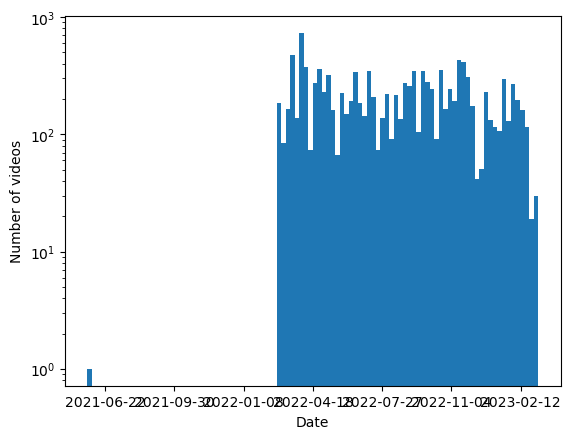

In [70]:
datetimes = [v.date.date() for v in videos]
datetimes_matplotlib = [mdates.date2num(d) for d in datetimes]
fig, ax = plt.subplots()
ax.hist(datetimes_matplotlib, bins=100)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.yscale('log')
plt.xlabel("Date")
plt.ylabel("Number of videos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



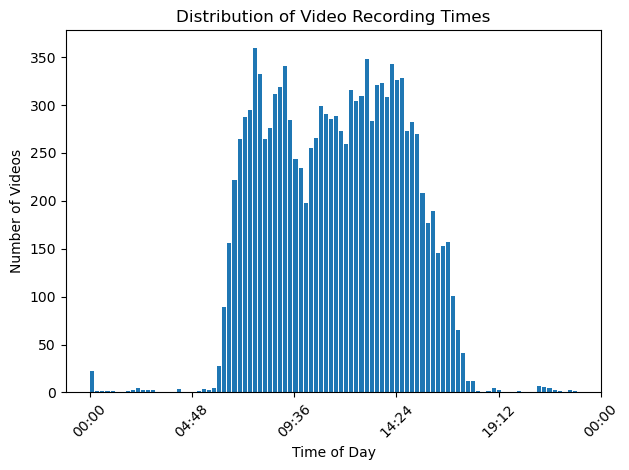

In [59]:
times = [v.date.time() for v in videos]

times_matplotlib = [mdates.date2num(datetime.combine(datetime.today(), t)) for t in times]

fig, ax = plt.subplots()
ax.hist(times_matplotlib, bins=24*4, rwidth=0.8)  # 24 bins for each hour of the day

# Format the x-axis to display hours
ax.xaxis.set_major_formatter(DateFormatter("%H:%M"))

plt.xlabel("Time of Day")
plt.ylabel("Number of Videos")
plt.title("Distribution of Video Recording Times")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

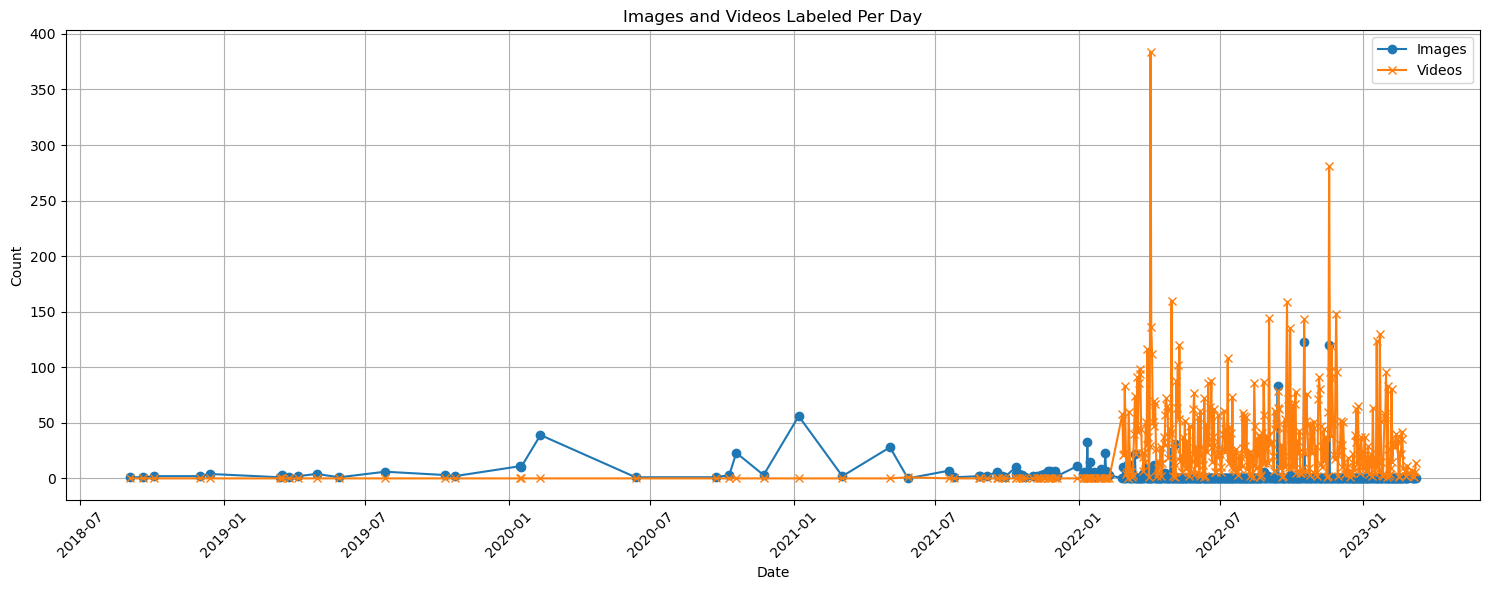

In [57]:
from collections import Counter
import matplotlib.pyplot as plt

# Counting the number of images and videos per day
image_dates = [image.data.date() for image in images]
video_dates = [video.date.date() for video in videos]

image_date_counts = Counter(image_dates)
video_date_counts = Counter(video_dates)

# Extracting unique dates from both images and videos
all_dates = set(image_dates + video_dates)

# Creating lists for plotting
dates_list = sorted(list(all_dates))
images_per_day = [image_date_counts.get(date, 0) for date in dates_list]
videos_per_day = [video_date_counts.get(date, 0) for date in dates_list]

# Plotting the data
plt.figure(figsize=(15, 6))
plt.plot(dates_list, images_per_day, label="Images", marker="o")
plt.plot(dates_list, videos_per_day, label="Videos", marker="x")
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Images and Videos Labeled Per Day")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [58]:
re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming "videos" is your list of Video objects

# Convert videos to a DataFrame
video_data = [(v.camera_id, v.date.date()) for v in videos]  # Extract camera_id and date
df_videos = pd.DataFrame(video_data, columns=["camera_id", "date"])

# Group by camera_id and date, then count
grouped_data = df_videos.groupby(["camera_id", "date"]).size().reset_index(name="count")

# Pivot data for plotting
pivot_data = grouped_data.pivot(index="date", columns="camera_id", values="count").fillna(0)

# Stacking data
stacked_data = pivot_data.cumsum(axis=1)

# Plotting
plt.figure(figsize=(15, 8))

# We use a bottom variable to keep track of the stacked bars" starting point
bottom = np.zeros(len(stacked_data))

for camera_id in stacked_data.columns:
    plt.bar(stacked_data.index, stacked_data[camera_id], bottom=bottom, label=camera_id)
    bottom += stacked_data[camera_id].values

plt.xlabel("Date")
plt.ylabel("Total Number of Videos (Log Scale)")
plt.title("Total Number of Videos Recorded Per Day (Stacked by Camera)")
plt.yscale("log")  # Logarithmic scale
plt.legend(title="Camera ID")
plt.grid(True)
plt.show()

KeyboardInterrupt: 